<a href="https://colab.research.google.com/github/cleopatra27/Nigerian-ethnic-group-classifier/blob/main/Classifing_ethnic_groups_in_Africa_based_on_dressing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install and import fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.5MB/s 
     |████████████████████████████████| 1.2MB 17.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 204kB 49.5MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
# Set bing API key
key = os.environ.get('AZURE_SEARCH_KEY', '66a90d84218846b489891ae2ded88a66')

In [4]:
#  define ethnic groups we want to categorize by
ethnic_group = 'igbo','yoruba','hausa','ijaw','efik','fula','tiv'

# set path
path = Path('nigerian ethnic attire')

In [5]:
# use fastbook bing search function to search using keyword ethnic_group + 'nigerian ethnic attire', and key
if not path.exists():
    path.mkdir()
    for o in ethnic_group:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} nigerian ethnic attire')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [6]:
# get a feel of our data
fns = get_image_files(path)
fns

(#934) [Path('nigerian ethnic attire/hausa/00000093.jpg'),Path('nigerian ethnic attire/hausa/00000079.jpg'),Path('nigerian ethnic attire/hausa/00000114.jpg'),Path('nigerian ethnic attire/hausa/00000058.jpg'),Path('nigerian ethnic attire/hausa/00000091.png'),Path('nigerian ethnic attire/hausa/00000066.jpg'),Path('nigerian ethnic attire/hausa/00000095.jpg'),Path('nigerian ethnic attire/hausa/00000000.jpg'),Path('nigerian ethnic attire/hausa/00000059.jpg'),Path('nigerian ethnic attire/hausa/00000125.jpg')...]

In [7]:
# verify non images
failed = verify_images(fns)
failed

# remove/unlink every non image
failed.map(Path.unlink);

(#8) [Path('nigerian ethnic attire/hausa/00000123.jpg'),Path('nigerian ethnic attire/hausa/00000099.jpg'),Path('nigerian ethnic attire/fula/00000031.jpg'),Path('nigerian ethnic attire/tiv/00000023.jpg'),Path('nigerian ethnic attire/tiv/00000132.jpg'),Path('nigerian ethnic attire/efik/00000140.jpg'),Path('nigerian ethnic attire/ijaw/00000057.jpg'),Path('nigerian ethnic attire/yoruba/00000121.jpg')]

In [9]:
# created a data block; input - ImageBlock, ouput - CategoryBlock; get_items- use function get_image_files, split with RandomSplitter, 20% of our data s the validation set
# a seed of 42 so 
nigerian_ethnic_attire = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = nigerian_ethnic_attire.dataloaders(path)

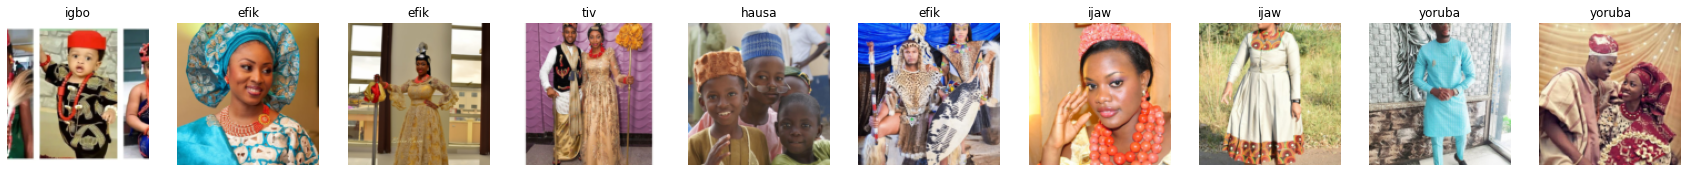

In [11]:
dls.valid.show_batch(max_n=10, nrows=1)

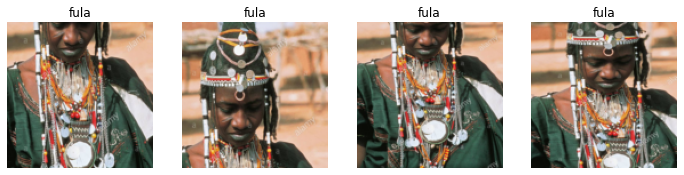

In [12]:
nigerian_ethnic_attire = nigerian_ethnic_attire.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = nigerian_ethnic_attire.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

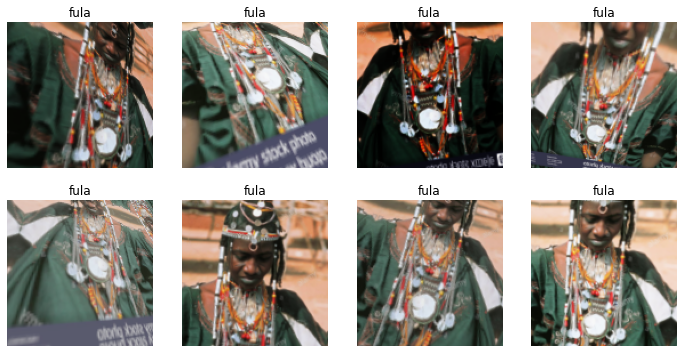

In [13]:
nigerian_ethnic_attire = nigerian_ethnic_attire.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = nigerian_ethnic_attire.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
nigerian_ethnic_attire = nigerian_ethnic_attire.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nigerian_ethnic_attire.dataloaders(path)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.198325,2.544090,0.810811,00:16


epoch,train_loss,valid_loss,error_rate,time
0,2.533525,2.299134,0.778378,00:16
1,2.345894,2.204416,0.724324,00:17
2,2.148918,2.260919,0.713513,00:17
3,2.000362,2.252742,0.697297,00:16


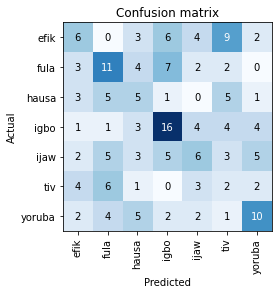

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

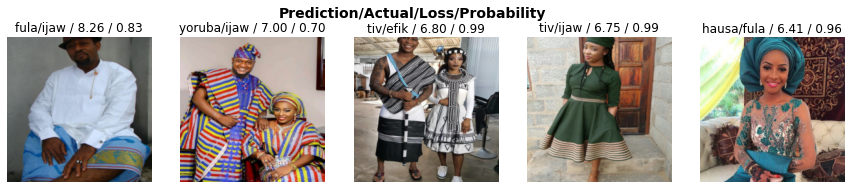

In [17]:
interp.plot_top_losses(5, nrows=1)